In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# load my curves
my_curver_rej = np.load("/home/users/o/oleksiyu/WORK/hyperproject/user/TT_reco_cons0.001_smls0.0001_advII6S4s_LCRF_2048b_lr2-4_dl/plots/compare/TwinTurbo_rejection_v_TPR_comb_seeds_CWOLA.npy")
my_curve_sic = np.load("/home/users/o/oleksiyu/WORK/hyperproject/user/TT_reco_cons0.001_smls0.0001_advII6S4s_LCRF_2048b_lr2-4_dl/plots/compare/TwinTurbo_SI_v_rej_comb_seeds_CWOLA.npy")
print(my_curver_rej)


[[0.00000000e+00 1.32803888e-05 3.98411665e-05 ... 9.99973439e-01
  9.99986720e-01 1.00000000e+00]
 [           inf            inf            inf ... 1.00026882e+00
  1.00019296e+00 1.00000000e+00]
 [           nan            nan            nan ... 2.31953982e-04
  2.15756339e-04 0.00000000e+00]]


In [3]:
# load CURTAINSF4F
npy_file =  "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_0/rejection_v_TPR.npy"
curtains_rej = np.load(npy_file)
npy_file =  "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_0/SI_v_rej.npy"
curtains_sic = np.load(npy_file)

In [5]:
# Load supervised 
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/radot_rej_3000.csv'
# Load the CSV file
radot1 = pd.read_csv(csv_file_path)
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/radot_tpr_3000.csv'
# Load the CSV file
radot2 = pd.read_csv(csv_file_path)
# Display the first few rows of the dataframe
print(radot1.head())

        tpr    rej_up  rej_center  rej_down
0  0.000000  121339.0    121339.0  121339.0
1  0.001001  121339.0    121339.0  121339.0
2  0.002002  121339.0    121339.0  121339.0
3  0.003003  121339.0    121339.0  121339.0
4  0.004004  121339.0    121339.0  121339.0


In [6]:
# Load Idealised 
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/rej_vs_tpr_3000_idealised.csv'
ideal_rej = pd.read_csv(csv_file_path)
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/sic_vs_reg_3000_idealised.csv'
ideal_sic = pd.read_csv(csv_file_path)

In [7]:
# load RADOT curves
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/rej_vs_tpr_3000_supervised.csv'
# Load the CSV file
super_rej = pd.read_csv(csv_file_path)
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/sic_vs_reg_3000_supervised.csv'
# Load the CSV file
super_sic = pd.read_csv(csv_file_path)
# Display the first few rows of the dataframe
print(radot1.head())

        tpr    rej_up  rej_center  rej_down
0  0.000000  121339.0    121339.0  121339.0
1  0.001001  121339.0    121339.0  121339.0
2  0.002002  121339.0    121339.0  121339.0
3  0.003003  121339.0    121339.0  121339.0
4  0.004004  121339.0    121339.0  121339.0


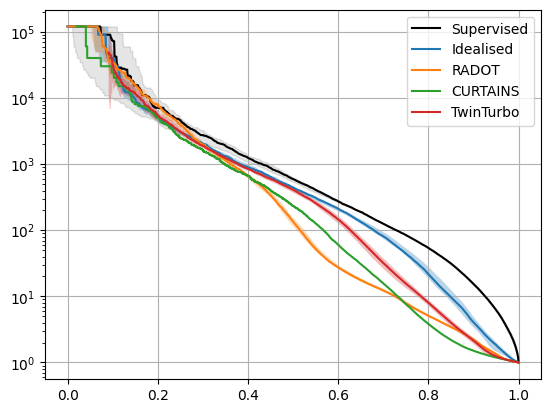

In [8]:
plt.figure()
plt.plot(super_rej["x"], super_rej["y_center"], label="Supervised", color="black")
plt.fill_between(super_rej["x"], super_rej["y_down"], super_rej["y_up"], alpha=0.1, color="black")
plt.plot(ideal_rej["x"], ideal_rej["y_center"], label="Idealised")
plt.fill_between(ideal_rej["x"], ideal_rej["y_down"], ideal_rej["y_up"], alpha=0.3)
plt.plot(radot1["tpr"], radot1["rej_center"], label="RADOT")
plt.fill_between(radot1["tpr"], radot1["rej_down"], radot1["rej_up"], alpha=0.3)
plt.plot(curtains_rej[0], curtains_rej[1], label="CURTAINS")
plt.fill_between(curtains_rej[0], curtains_rej[1]-0, curtains_rej[1]+0, alpha=0.3)
plt.plot(my_curver_rej[0], my_curver_rej[1], label="TwinTurbo")
plt.fill_between(my_curver_rej[0], my_curver_rej[1]-my_curver_rej[2], my_curver_rej[1]+my_curver_rej[2], alpha=0.3)
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig("/home/users/o/oleksiyu/WORK/hyperproject/plots/final2/inverse_rej.png")

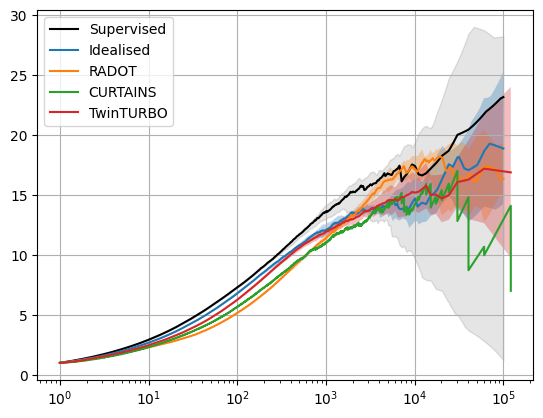

In [9]:
plt.figure()
plt.plot(super_sic["x"], super_sic["y_center"], label="Supervised", color="black")
plt.fill_between(super_sic["x"], super_sic["y_down"], super_sic["y_up"], alpha=0.1, color="black")
plt.plot(ideal_sic["x"], ideal_sic["y_center"], label="Idealised")
plt.fill_between(ideal_sic["x"], ideal_sic["y_down"], ideal_sic["y_up"], alpha=0.3)
plt.plot(radot2["rejection"], radot2["tpr_center"], label="RADOT")
plt.fill_between(radot2["rejection"], radot2["tpr_down"], radot2["tpr_up"], alpha=0.3)
plt.plot(curtains_sic[0], curtains_sic[1], label="CURTAINS")
plt.fill_between(curtains_sic[0], curtains_sic[1]-0, curtains_sic[1]+0, alpha=0.3)
plt.plot(my_curve_sic[0], my_curve_sic[1], label="TwinTURBO")
plt.fill_between(my_curve_sic[0], my_curve_sic[1]-my_curve_sic[2], my_curve_sic[1]+my_curve_sic[2], alpha=0.3)
plt.xscale("log")
plt.grid()
plt.legend()
plt.savefig("/home/users/o/oleksiyu/WORK/hyperproject/plots/final2/SIC.png")

In [10]:
def linear_interpolation(x, y, x_new):
    # Convert lists to numpy arrays for easier manipulation
    x = np.array(x)
    y = np.array(y)

    # Ensure that x_new is within the range of x
    if x_new < np.min(x) or x_new > np.max(x):
        raise ValueError("x_new is out of bounds of x.")

    # Find indices of the two closest values in x that bound x_new
    idx = np.searchsorted(x, x_new)
    
    # Handle edge case where x_new matches exactly the smallest or largest x value
    if x_new == x[idx - 1]:
        return y[idx - 1]
    elif x_new == x[idx]:
        return y[idx]

    # Get the two x and y values surrounding x_new
    x0, x1 = x[idx - 1], x[idx]
    y0, y1 = y[idx - 1], y[idx]

    # Perform linear interpolation
    y_new = y0 + (y1 - y0) * (x_new - x0) / (x1 - x0)

    return y_new

## Plot the SI vs Rejection curves

In [52]:
folder = "/home/users/o/oleksiyu/WORK/hyperproject/twinturbo/workspaces/DOPING/TRANSITv1_dopings"
dopings = [50, 100, 333, 500, 667, 1000, 3000]

In [53]:
SI_vs_rejinv_curves = []
def get_y_and_std_curves(curves, x):
    y = []
    for curve in curves:
        y += [linear_interpolation(curve[0], curve[1], x)]
    return np.mean(y), np.std(y)

Text(0.5, 1.0, 'SI at 1/Rejection rate = 100')

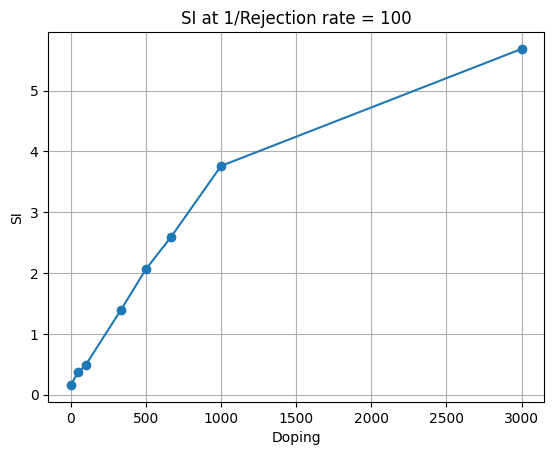

In [54]:
# get curves for curtains
n_dope_per_run=[0, 50, 100, 333, 500, 667, 1000, 3000]
runs = [0, 1, 2, 4, 5, 6, 7, 8]
SIs_CURTAINS_100 = []
SIs_CURTAINS_1000 = []

def getSI_vs_doping_CURTAINS(target_inv_rej):
    # plt.figure()
    SIs =[]
    SI_stds = []
    for run, doping in zip(runs, n_dope_per_run):
        SI_rejs = []
        for seed in range(5):
            SI_curve_file = f"/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_{run}/seed_{seed}/SI_v_rej.npy"
            SI_rej = np.load(SI_curve_file)
            SI_rej[0] = np.flip(SI_rej[0])
            SI_rej[1] = np.flip(SI_rej[1])
            SI_rejs += [SI_rej]
            #plt.plot(SI_rej[0], SI_rej[1], label=f"{doping}")
        y, y_std = get_y_and_std_curves(SI_rejs, target_inv_rej)
        SIs += [y]
        SI_stds += [y_std]
    # plt.grid()
    # plt.ylabel("SI")
    # plt.xlabel("1/Rejection rate")
    # plt.axvline(100, color='black')
    # plt.xscale('log')
    # plt.legend()
    return SIs, SI_stds

SIs_CURTAINS_100, SIs_CURTAINS_100_err = getSI_vs_doping_CURTAINS(100)
SI_vs_rejinv_curves += [{"tags": ["invrej_100"],
                         "label": "CURTAINS",
                         "x": np.array(n_dope_per_run),
                         "y": np.array(SIs_CURTAINS_100),
                         "y_err": np.array(SIs_CURTAINS_100_err)}]
SIs_CURTAINS_1000, SIs_CURTAINS_1000_err = getSI_vs_doping_CURTAINS(1000)
SI_vs_rejinv_curves += [{"tags": ["invrej_1000"],
                         "label": "CURTAINS",
                         "x": np.array(n_dope_per_run),
                         "y": np.array(SIs_CURTAINS_1000),
                         "y_err": np.array(SIs_CURTAINS_1000_err)}]

# plt.figure()
# plt.plot(n_dope_per_run, SIs_CURTAINS_100, marker='o')
# plt.grid()
# plt.ylabel("SI")
# plt.xlabel("Doping")
# plt.title(f"SI at 1/Rejection rate = 100")

In [55]:
def getSI_vs_doping_curve_TRANSIT(target_inv_rej):
    SIs = []
    SI_errs = []
    for doping in dopings:
        SI_curve_file = f"{folder}/run-doping_{doping}/plots/compare/TwinTurbo_SI_v_rej_comb_seeds_CWOLA.npy"
        SI_rej = np.load(SI_curve_file)
        rej_inv = SI_rej[0]
        SI = SI_rej[1]
        SI_err = SI_rej[2]
        #plt.plot(rej_inv, SI, marker='o', label=f"{doping}")
        SIs.append(linear_interpolation(rej_inv, SI, target_inv_rej))
        SI_errs.append(linear_interpolation(rej_inv, SI_err, target_inv_rej))
    return np.array(SIs), np.array(SI_errs)

In [56]:
SIs, SI_errs = getSI_vs_doping_curve_TRANSIT(100)
SI_vs_rejinv_curves += [{"tags": ["invrej_100"],
                         "label": "TRANSIT",
                         "x": np.array(dopings),
                         "y": SIs,
                         "y_err": SI_errs}]

In [57]:
SIs, SI_errs = getSI_vs_doping_curve_TRANSIT(1000)
SI_vs_rejinv_curves += [{"tags": ["invrej_1000"],
                         "label": "TRANSIT",
                         "x": dopings,
                         "y": SIs,
                         "y_err": SI_errs}]

{'tags': ['invrej_100'], 'label': 'CURTAINS', 'x': array([   0,   50,  100,  333,  500,  667, 1000, 3000]), 'y': array([0.15989631, 0.36927532, 0.48729747, 1.38830711, 2.06130605,
       2.58947174, 3.75963996, 5.68370597]), 'y_err': array([0.07615349, 0.09965769, 0.16716174, 0.10859745, 0.23419429,
       0.24927339, 0.1547733 , 0.046288  ])}
{'tags': ['invrej_100'], 'label': 'TRANSIT', 'x': array([  50,  100,  333,  500,  667, 1000, 3000]), 'y': array([0.06423661, 0.11579977, 0.87647802, 1.67589802, 2.69185796,
       4.19963076, 6.07140968]), 'y_err': array([0.02397666, 0.0675684 , 0.43006526, 0.49941041, 0.6521156 ,
       0.08833786, 0.43797071])}


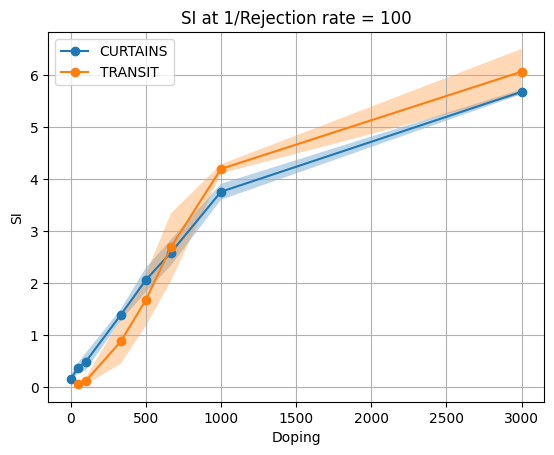

In [58]:
rej_target = 100
for curve in SI_vs_rejinv_curves:
    if f"invrej_{rej_target}" in curve["tags"]:
        print(curve)
        plt.plot(curve["x"], curve["y"], marker='o', label=curve["label"])
        plt.fill_between(curve["x"], curve["y"]-curve["y_err"], curve["y"]+curve["y_err"], alpha=0.3)
plt.grid()
plt.ylabel("SI")
plt.xlabel("Doping")
plt.title(f"SI at 1/Rejection rate = {rej_target}")
plt.legend()

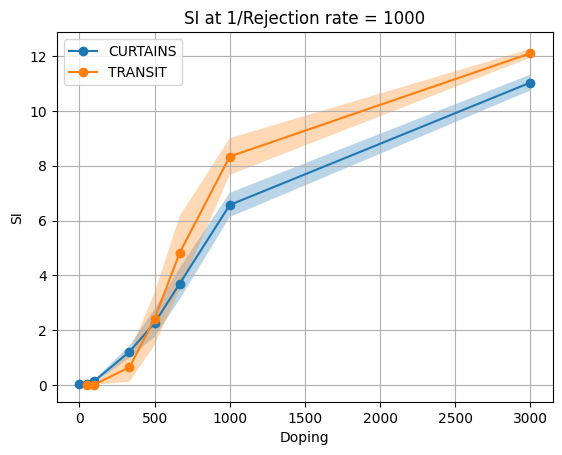

In [59]:

rej_target = 1000
for curve in SI_vs_rejinv_curves:
    if f"invrej_{rej_target}" in curve["tags"]:
        plt.plot(curve["x"], curve["y"], marker='o',  label=curve["label"])
        plt.fill_between(curve["x"], curve["y"]-curve["y_err"], curve["y"]+curve["y_err"], alpha=0.3)
plt.grid()
plt.ylabel("SI")
plt.xlabel("Doping")
plt.title(f"SI at 1/Rejection rate = {rej_target}")
plt.legend()